## Folder Structure

Each independent case has a dedicated folder identified by a five-digit number. Within each of these “case” folders, there are four sub-folders, each of them corresponding to each of the structural multi-parametric MRI (mpMRI) scans, in DICOM format. The exact mpMRI scans included are:

- Fluid Attenuated Inversion Recovery (FLAIR)
- T1-weighted pre-contrast (T1w)
- T1-weighted post-contrast (T1Gd or T1wCE)
- T2-weighted (T2)

![](https://i.ibb.co/T12zwPv/1.png)

## Files
- train/ - folder containing the training files, with each top-level folder representing a subject
- train_labels.csv - file containing the target MGMT_value for each subject in the training data (e.g. the presence of MGMT promoter methylation)
- test/ - the test files, which use the same structure as train/; your task is to predict the MGMT_value for each subject in the test data. NOTE: the total size of the rerun test set (Public and Private) is ~5x the size of the Public test set
- sample_submission.csv - a sample submission file in the correct format


In [1]:
import os
import json
import glob
import random
import collections

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import cv2
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [4]:
data_dir = '/home/asheesh/Documents/Github/kaggle-rsna-miccai/data/rsna-miccai-brain-tumor-radiogenomic-classification'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

## Check MGMT scores for different subjects and see if the dataset is balanced or not

In [5]:
train_df = pd.read_csv(os.path.join(data_dir, 'train_labels.csv'))
train_df

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1
...,...,...
580,1005,1
581,1007,1
582,1008,1
583,1009,0


<AxesSubplot:xlabel='MGMT_value', ylabel='count'>

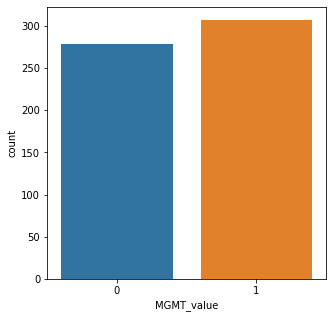

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_df, x="MGMT_value")

## Data Visualization

In [7]:
def load_dicom(path):
    dicom = pydicom.read_file(path)
    data = dicom.pixel_array
    data = data - np.min(data)
    if np.max(data) != 0:
        data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return data

In [8]:
def visualize_sample(
    brats21id, 
    slice_i,
    mgmt_value,
    types=("FLAIR", "T1w", "T1wCE", "T2w")
):
    plt.figure(figsize=(16, 5))
    patient_path = os.path.join(train_dir, str(brats21id).zfill(5),)
    for i, t in enumerate(types, 1):
        t_paths = sorted(
            glob.glob(os.path.join(patient_path, t, "*")), 
            key=lambda x: int(x[:-4].split("-")[-1]),
        )
        data = load_dicom(t_paths[int(len(t_paths) * slice_i)])
        plt.subplot(1, 4, i)
        plt.imshow(data, cmap="gray")
        plt.title(f"{t}", fontsize=16)
        plt.axis("off")

    plt.suptitle(f"MGMT_value: {mgmt_value}", fontsize=16)
    plt.show()

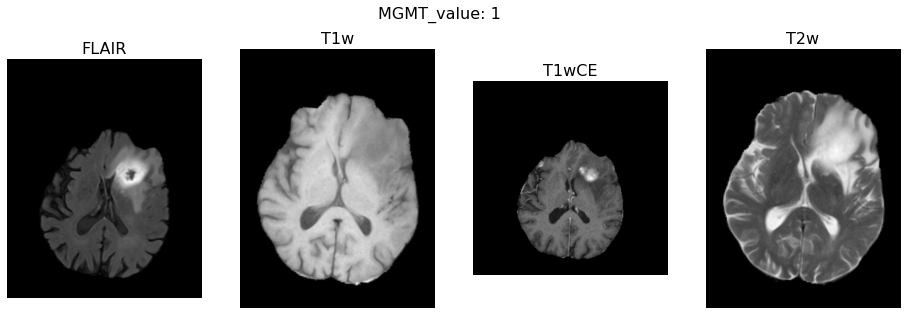

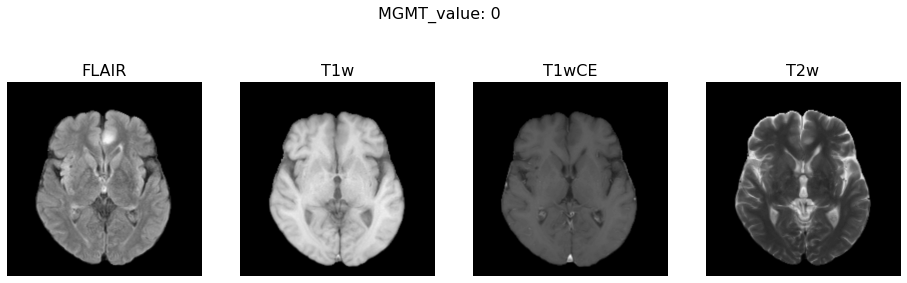

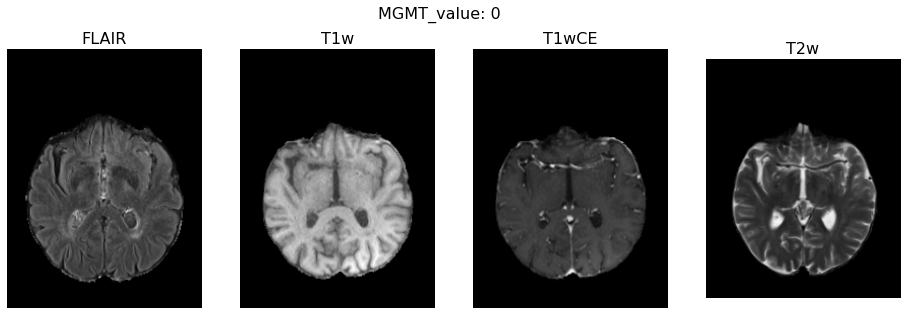

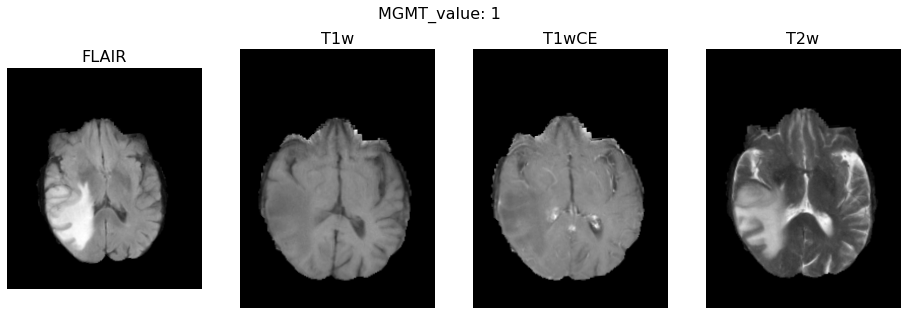

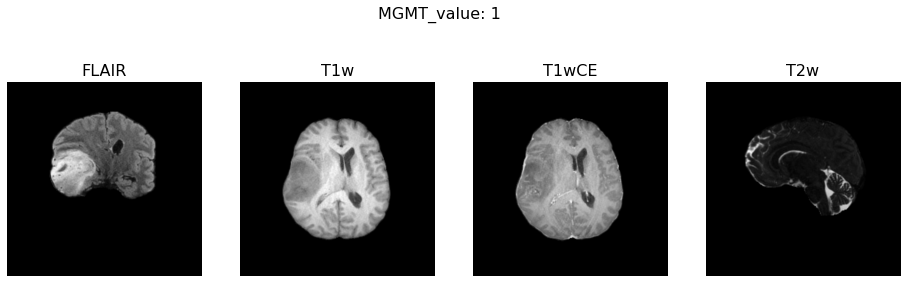

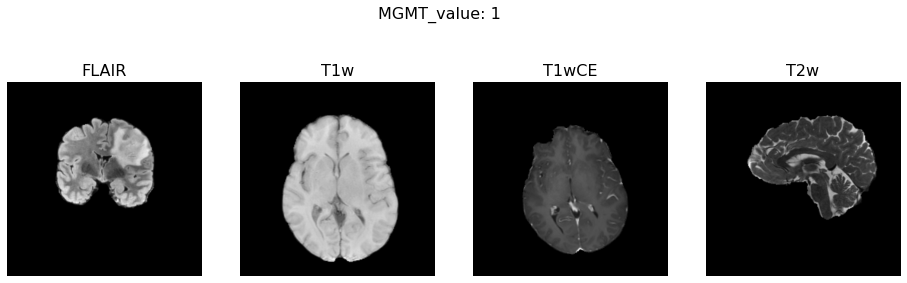

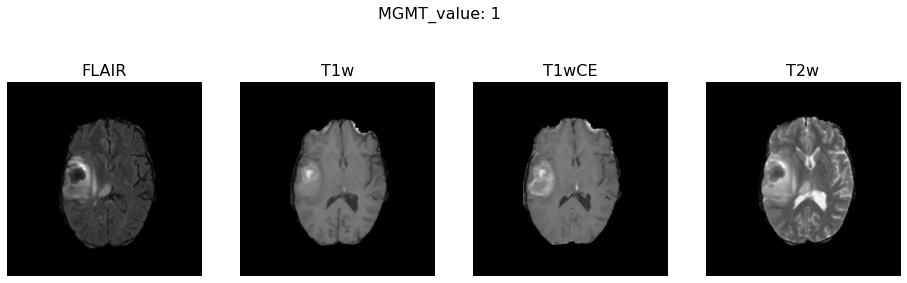

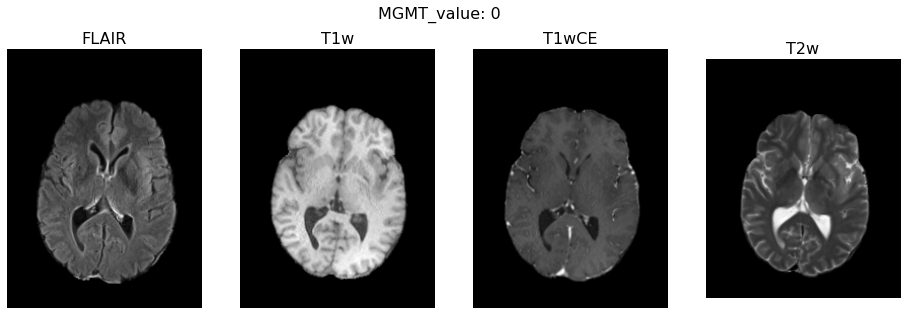

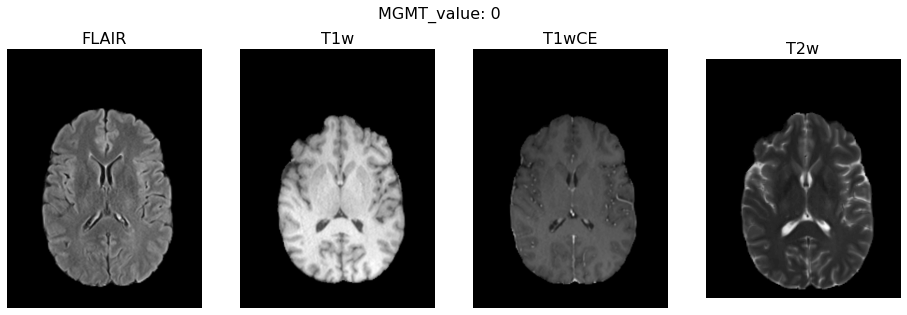

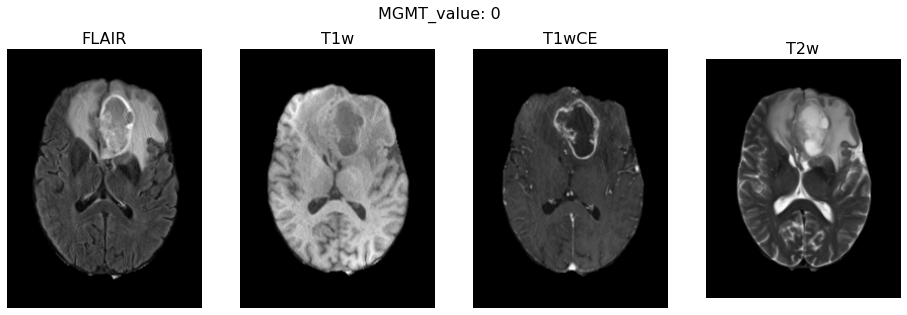

In [9]:
for i in random.sample(range(train_df.shape[0]), 10):
    _brats21id = train_df.iloc[i]["BraTS21ID"]
    _mgmt_value = train_df.iloc[i]["MGMT_value"]
    visualize_sample(brats21id=_brats21id, mgmt_value=_mgmt_value, slice_i=0.5)